# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city Ask BSC helped
    query_url= url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data Ask Bsc helped 
        city_weather= requests.get(query_url).json()        
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
    #Exception as e:from ASKBsc testing
        #print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | ar rutbah
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | neryungri
Processing Record 9 of Set 1 | zigong
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | zaozersk
Processing Record 14 of Set 1 | takab
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | paka
Processing Record 19 of Set 1 | cromwell
Processing Record 20 of Set 1 | pacific grove
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 |

Processing Record 41 of Set 4 | akwatia
Processing Record 42 of Set 4 | kapuskasing
Processing Record 43 of Set 4 | tabas
Processing Record 44 of Set 4 | kone
Processing Record 45 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 46 of Set 4 | gaspe
Processing Record 47 of Set 4 | cable beach
City not found. Skipping...
Processing Record 48 of Set 4 | derzhavinsk
Processing Record 49 of Set 4 | lerwick
Processing Record 0 of Set 5 | annweiler am trifels
Processing Record 1 of Set 5 | qaqortoq
Processing Record 2 of Set 5 | tanjung selor
City not found. Skipping...
Processing Record 3 of Set 5 | tougan
Processing Record 4 of Set 5 | nuku'alofa
Processing Record 5 of Set 5 | monte patria
Processing Record 6 of Set 5 | zharkent
Processing Record 7 of Set 5 | geraldton
Processing Record 8 of Set 5 | boali
Processing Record 9 of Set 5 | kolwezi
Processing Record 10 of Set 5 | beipiao
Processing Record 11 of Set 5 | trincomalee
Processing Record 12 of Set 5 | valdivia
Processi

Processing Record 33 of Set 8 | puerto baquerizo moreno
Processing Record 34 of Set 8 | effium
Processing Record 35 of Set 8 | asau
Processing Record 36 of Set 8 | soroti
Processing Record 37 of Set 8 | ulan bator
Processing Record 38 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 39 of Set 8 | fismes
Processing Record 40 of Set 8 | padang
Processing Record 41 of Set 8 | guarapari
Processing Record 42 of Set 8 | venelles
Processing Record 43 of Set 8 | nueva gerona
Processing Record 44 of Set 8 | guixi
Processing Record 45 of Set 8 | santa rosalia
Processing Record 46 of Set 8 | kalianget
Processing Record 47 of Set 8 | olecko
Processing Record 48 of Set 8 | calvi
Processing Record 49 of Set 8 | lagoa
Processing Record 0 of Set 9 | rio grande
Processing Record 1 of Set 9 | gadzhiyevo
Processing Record 2 of Set 9 | itamaraca
Processing Record 3 of Set 9 | arkhangel'sk
Processing Record 4 of Set 9 | viedma
Processing Record 5 of Set 9 | utiel
Processing Record 

Processing Record 26 of Set 12 | grand baie
Processing Record 27 of Set 12 | jizzax
Processing Record 28 of Set 12 | idrinskoye
Processing Record 29 of Set 12 | balikpapan
Processing Record 30 of Set 12 | lianshan
Processing Record 31 of Set 12 | buritizeiro
Processing Record 32 of Set 12 | souillac
Processing Record 33 of Set 12 | forster
Processing Record 34 of Set 12 | nova sintra
Processing Record 35 of Set 12 | san antonio oeste
Processing Record 36 of Set 12 | telaga batu
City not found. Skipping...
Processing Record 37 of Set 12 | canchungo
Processing Record 38 of Set 12 | labrador city
Processing Record 39 of Set 12 | kerikeri
Processing Record 40 of Set 12 | taroa
Processing Record 41 of Set 12 | armidale
Processing Record 42 of Set 12 | altay
Processing Record 43 of Set 12 | el calafate
Processing Record 44 of Set 12 | constantia
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,5.85,88,62,2.56,AU,1689871303
1,waitangi,-43.9535,-176.5597,6.57,93,88,0.89,NZ,1689871006
2,bredasdorp,-34.5322,20.0403,9.48,71,9,4.74,ZA,1689871304
3,ar rutbah,33.0381,40.2848,36.00,10,0,4.77,IQ,1689871304
4,whitehorse,60.7161,-135.0538,15.61,54,75,1.54,CA,1689871176


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,5.85,88,62,2.56,AU,1689871303
1,waitangi,-43.9535,-176.5597,6.57,93,88,0.89,NZ,1689871006
2,bredasdorp,-34.5322,20.0403,9.48,71,9,4.74,ZA,1689871304
3,ar rutbah,33.0381,40.2848,36.00,10,0,4.77,IQ,1689871304
4,whitehorse,60.7161,-135.0538,15.61,54,75,1.54,CA,1689871176


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

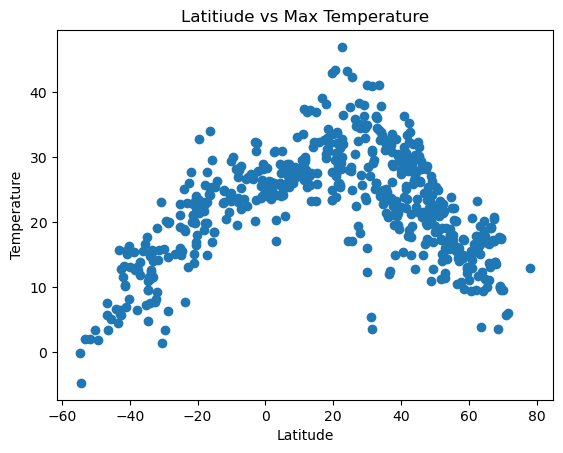

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title ("Latitiude vs Max Temperature")
plt.show()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

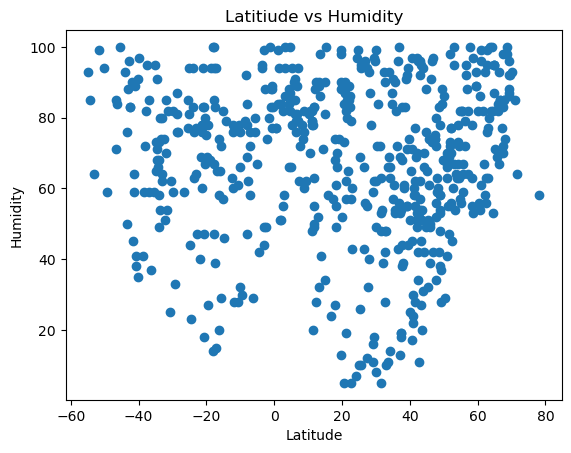

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title ("Latitiude vs Humidity")
plt.show()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

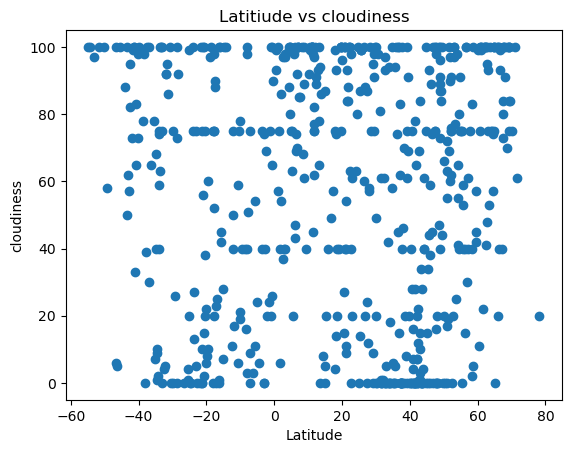

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title ("Latitiude vs cloudiness")
plt.show()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

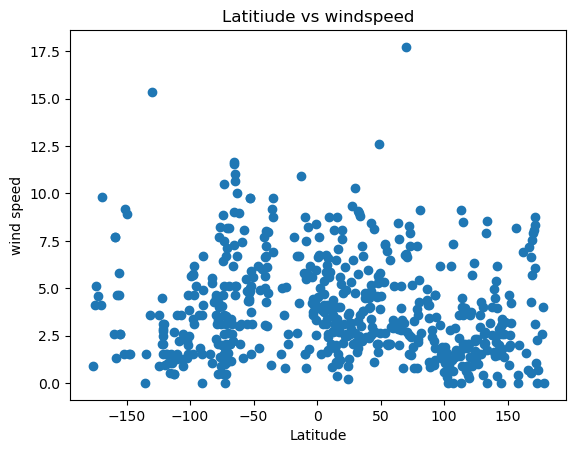

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lng']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('wind speed')
plt.title ("Latitiude vs windspeed")
plt.show()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# YOUR CODE HERE
print(regress_values)

City_ID
0      3.357200
1      4.583587
2      3.839144
3      3.762486
4      4.426422
         ...   
568    3.266660
569    3.340792
570    3.581367
571    4.188711
572    3.806543
Name: Lng, Length: 573, dtype: float64


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df
northern_hemi_df = northern_hemi_df.loc[(northern_hemi_df["Lat"]>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ar rutbah,33.0381,40.2848,36.00,10,0,4.77,IQ,1689871304
4,whitehorse,60.7161,-135.0538,15.61,54,75,1.54,CA,1689871176
5,wailua homesteads,22.0669,-159.3780,25.44,89,100,7.72,US,1689871019
7,neryungri,56.6709,124.6491,10.43,92,100,2.31,RU,1689871305
8,zigong,29.3416,104.7769,23.82,97,98,2.81,CN,1689871305


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df
southern_hemi_df = southern_hemi_df.loc[(southern_hemi_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,5.85,88,62,2.56,AU,1689871303
1,waitangi,-43.9535,-176.5597,6.57,93,88,0.89,NZ,1689871006
2,bredasdorp,-34.5322,20.0403,9.48,71,9,4.74,ZA,1689871304
6,avarua,-21.2078,-159.7750,21.03,60,75,2.57,CK,1689871160
9,port-aux-francais,-49.3500,70.2167,1.79,59,58,17.73,TF,1689871305


###  Temperature vs. Latitude Linear Regression Plot

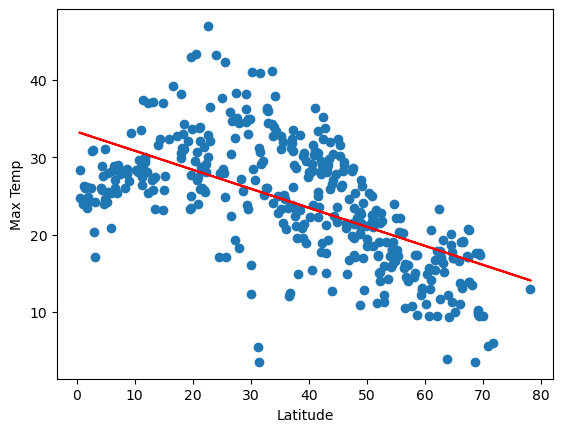

In [18]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

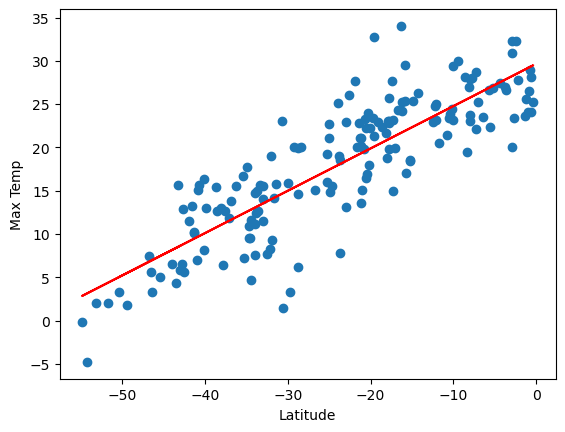

In [19]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE #It shows that in the southern Hemisphere there a postive correlation as you get closer to the equator the warmer it gets , its a neagtive for the northern but its the same closer you get the warmer it is.

### Humidity vs. Latitude Linear Regression Plot

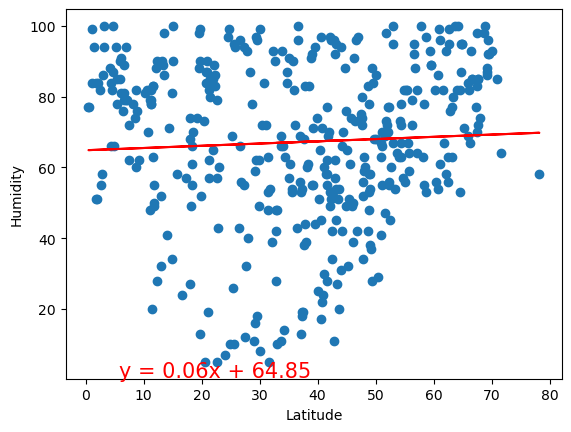

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

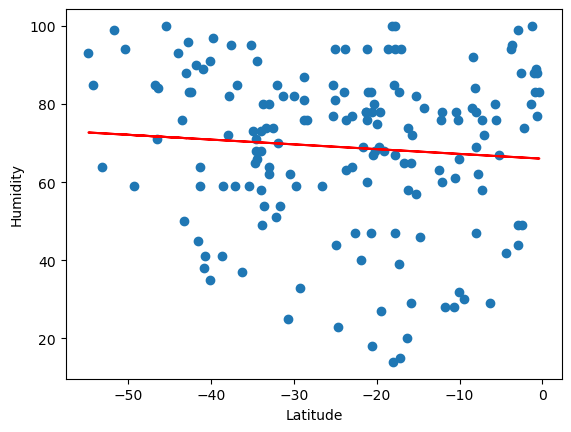

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE# There a slight postive correlation in the north the futher away you are from the equator the more humdit it gets there are and its the inverese for the southern.

### Cloudiness vs. Latitude Linear Regression Plot

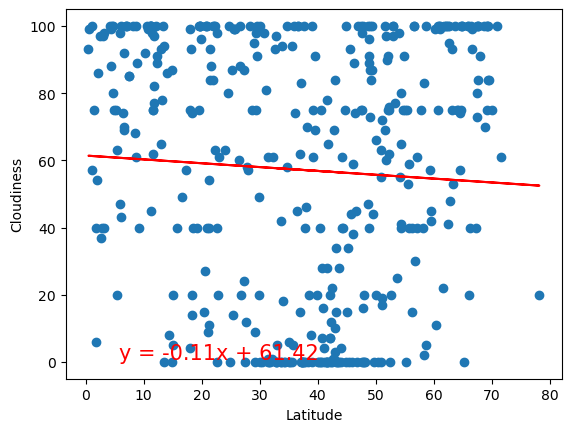

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

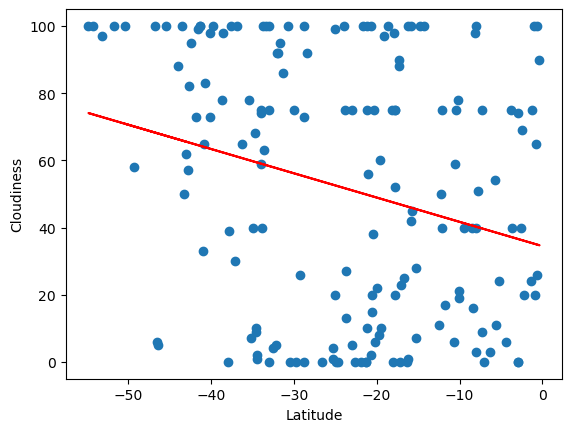

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE There a slight postive correlation in the north the futher away you are from the equator the more clouds there are and its the inverese for the southern.

### Wind Speed vs. Latitude Linear Regression Plot

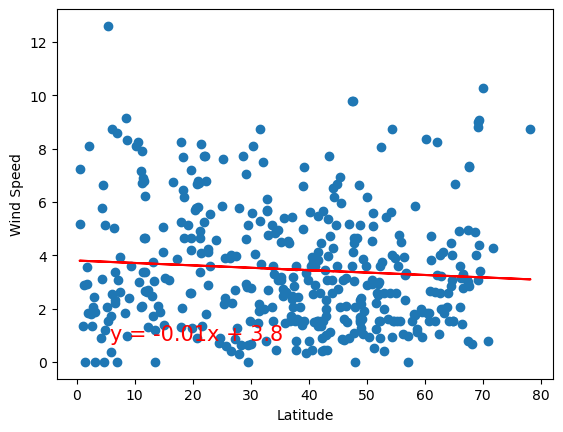

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

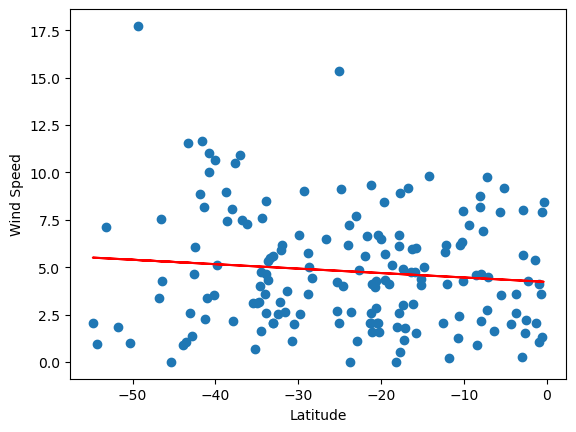

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE There are both a negative correlation closer or futher away from the equator the wind slows down.